In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")


In [172]:
data=pd.read_csv('wdbc.data',header=None)

data.head()

In [173]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [174]:
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

In [175]:
data.to_csv('labeledData.csv',header=headers,index=False)

In [176]:
data=pd.read_csv('labeledData.csv')
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [177]:
def diag(z):
    if z=='M':
        return 1
    else:
        return 0
z=data['diagnosis'].apply(diag)
data.diagnosis=z

In [178]:
df=pd.DataFrame(data)
df=df.drop('id',axis=1)
df

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [179]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [180]:


from sklearn.preprocessing import StandardScaler
x = df.iloc[:,1:31]
y = df.iloc[:,0:1]
# performing standardization
sc = StandardScaler()
x_scaled = sc.fit_transform(x)



In [181]:
from sklearn.decomposition import PCA
components=None
pca=PCA(n_components=components)
pca.fit(x_scaled)

PCA()

In [182]:
print('Cumulative Variances Percentage:')
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative Variances Percentage:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


Text(0, 0.5, 'Explained variance(%)')

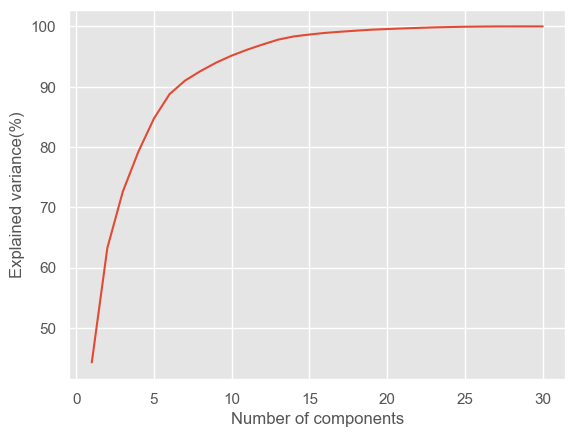

In [183]:
components=len(pca.explained_variance_ratio_)\
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance(%)')

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components:6


Text(0, 0.5, 'Explained Variance (%)')

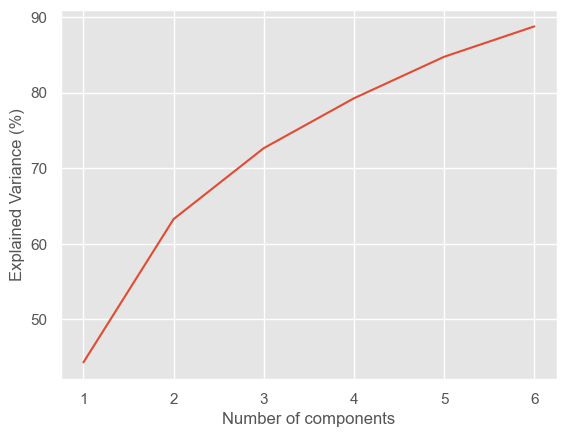

In [184]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=0.85)
pca.fit(x_scaled)
print('Cumulative Variances (Percentage):')
print(np.cumsum(pca.explained_variance_ratio_*100))
components=len(pca.explained_variance_ratio_)
print(f'Number of components:{components}')
plt.plot(range(1,components+1),
np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

In [185]:
pca_components=abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

In [186]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    df2=df.drop('diagnosis',axis=1)
    print(f'Component {row}: {df2.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean_concave points', 'mean_concavity', 'worst_concave points', 'mean_compactness']
Component 1: ['mean_fractal dimension', 'SE_fractal dimension', 'worst_fractal dimension', 'mean_radius']
Component 2: ['SE_texture', 'SE_smoothness', 'SE_symmetry', 'worst_symmetry']
Component 3: ['worst_texture', 'mean_texture', 'SE_texture', 'mean_smoothness']
Component 4: ['mean_smoothness', 'SE_concavity', 'worst_smoothness', 'mean_symmetry']
Component 5: ['worst_symmetry', 'SE_symmetry', 'worst_smoothness', 'mean_symmetry']


In [187]:
x_pca=pca.transform(x_scaled)
print(x_pca.shape)
print(x_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
random_state=42
x_train,x_test,y_train,y_test=\
train_test_split(x_scaled,y,test_size=0.3,shuffle=True,random_state=random_state)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.9824561403508771

In [189]:
random_state=42
x_pca_train,x_pca_test,y_pca_train,y_pca_test=\
train_test_split(x_pca,y,test_size=0.3,shuffle=True,random_state=random_state)
log_reg_pca=LogisticRegression()
log_reg_pca.fit(x_pca_train,y_pca_train)
log_reg_pca.score(x_pca_test,y_pca_test)

0.9883040935672515

Accuracy is: 0.9883040935672515


<Axes: >

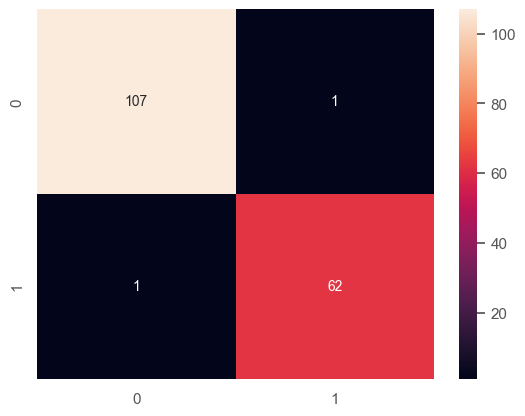

In [191]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pca_test,log_reg_pca.predict(x_pca_test))
print('Accuracy is:',acc)
cm=confusion_matrix(y_pca_test,log_reg_pca.predict(x_pca_test))
sns.heatmap(cm,annot=True,fmt='d')

Accuracy is: 0.9883040935672515


<Axes: >

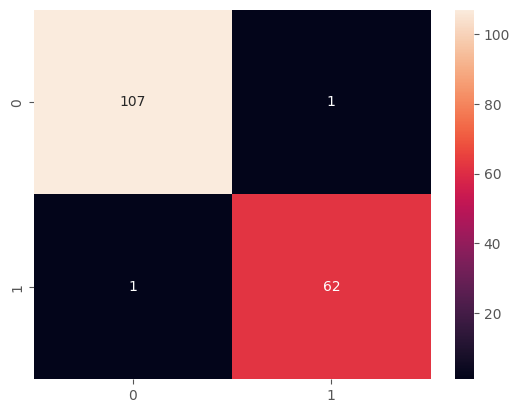

In [213]:
acc_pca=accuracy_score(y_pca_test,log_reg_pca.predict(x_pca_test))
print('Accuracy is:',acc_pca)
cm=confusion_matrix(y_pca_test,log_reg_pca.predict(x_pca_test))
sns.heatmap(cm,annot=True,fmt='d')